In [1]:
import numpy as np
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
from scipy import stats
import matplotlib.mlab as mlab
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['chisquare', 'normal', 'binomial', 'poisson', 'exponential']

In [3]:
mysize = (2000 / (np.array(range(1,101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 2000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


# CHI-SQ distribution

In [4]:
df = 100

In [5]:
md = {}

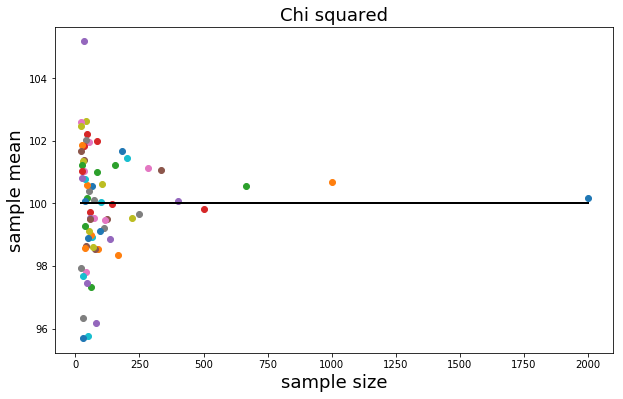

Figure 1. Sample mean vs the sample size for CHI SQ distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us


In [6]:
md[distributions[0]] = {} 

for n in mysize:
    md[distributions[0]][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md[distributions[0]]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[distributions[0]]:
    if not type(nn) == str:
        md[distributions[0]]['means'][nn] = md[distributions[0]][nn].mean()
        
        #and plot it
        axchisq_mu_n.plot(nn, md[distributions[0]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
pl.show()
print("Figure 1. Sample mean vs the sample size for CHI SQ distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us")

### For all the sample means distributions we can see some skeweness sometimes depending on the run because of the random nature of the distributions. However, this skeweness is minimal.

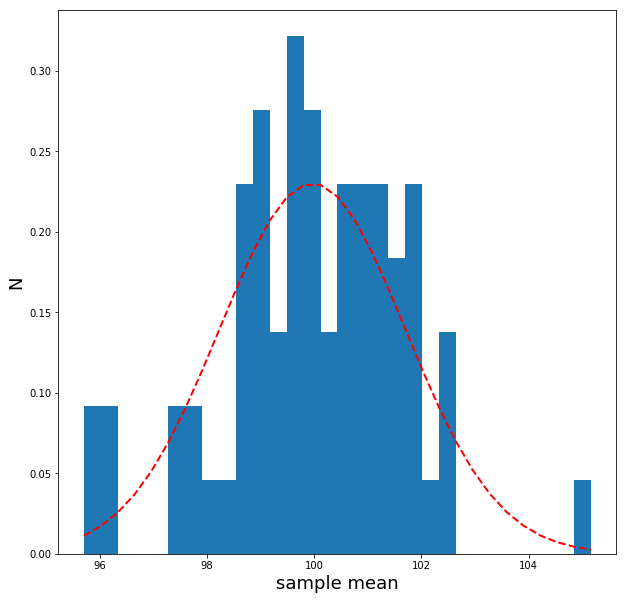

Figure 2. Distribution of means from the Chi square distribution. This histogram shows that the bulk of the distribution of the sample means is centered at 100, but the distribution is slightly positively skewed.


In [16]:
allmeans = list(md[distributions[0]]['means'].values())
#pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)

(mu,sigma) = stats.norm.fit(allmeans)
pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
n,bins,patches=pl.hist(allmeans,30, normed=1)
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

print("Figure 2. Distribution of means from the Chi square distribution. This histogram shows that the bulk of the distribution of the sample means is centered at 100, but the distribution is slightly positively skewed.")


# NORMAL distribution

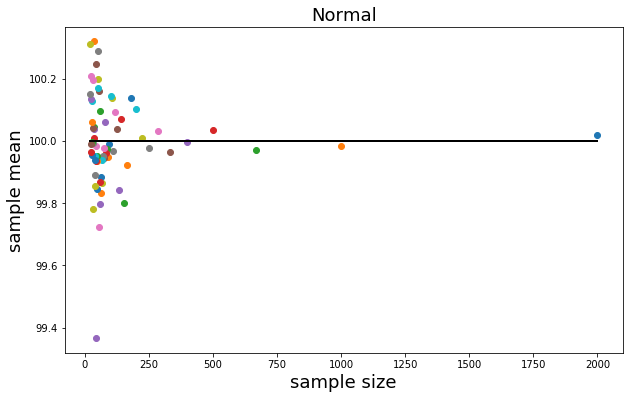

Figure 3. Sample mean vs the sample size for NORMAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us


In [8]:
md[distributions[1]] = {} 

for n in mysize:
    md[distributions[1]][n] = np.random.normal(loc=df, size = n)
    
# save the means for plotting later    

md[distributions[1]]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[distributions[1]]:
    if not type(nn) == str:
        md[distributions[1]]['means'][nn] = md[distributions[1]][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[distributions[1]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
pl.show()
print("Figure 3. Sample mean vs the sample size for NORMAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us")

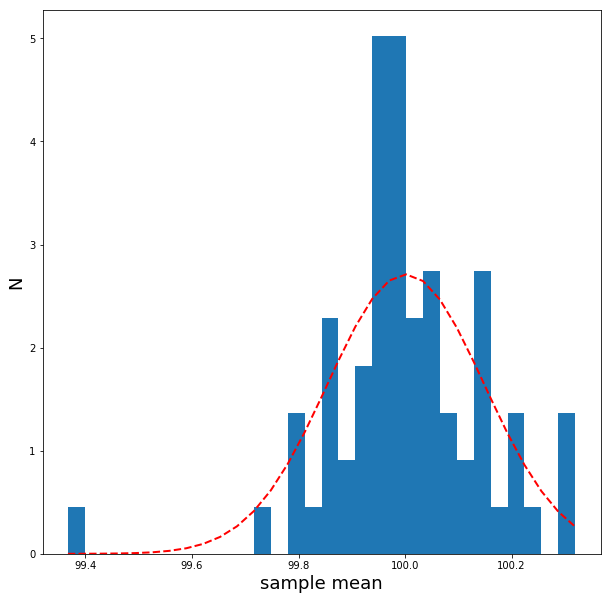

Figure 4. Distribution of means from the Normal distribution. This histogram shows that the bulk of the distribution of the sample means is centered at 100, but the distribution is slightly negatively skewed.


In [9]:
allmeans = list(md[distributions[1]]['means'].values())
(mu,sigma) = stats.norm.fit(allmeans)
pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
n,bins,patches=pl.hist(allmeans,30, normed=1)
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

print("Figure 4. Distribution of means from the Normal distribution. This histogram shows that the bulk of the distribution of the sample means is centered at 100, but the distribution is slightly negatively skewed.")

# BINOMIAL distribution

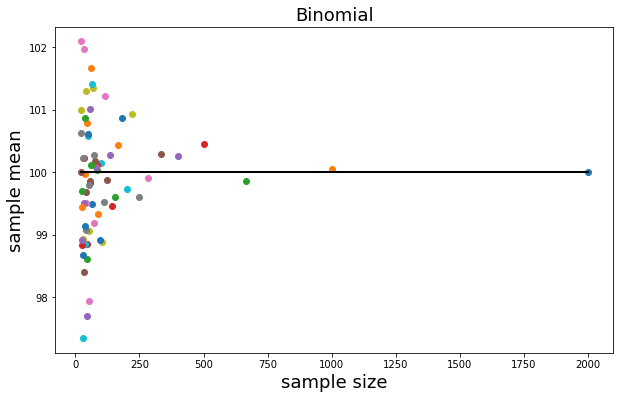

Figure 5. Sample mean vs the sample size for BINOMIAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us


In [10]:
md[distributions[2]] = {} 
p=0.4
for n in mysize:
    md[distributions[2]][n] = np.random.binomial(df/p,p, size = n)
    
# save the means for plotting later    

md[distributions[2]]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[distributions[2]]:
    if not type(nn) == str:
        md[distributions[2]]['means'][nn] = md[distributions[2]][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[distributions[2]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
pl.show()
print("Figure 5. Sample mean vs the sample size for BINOMIAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us")

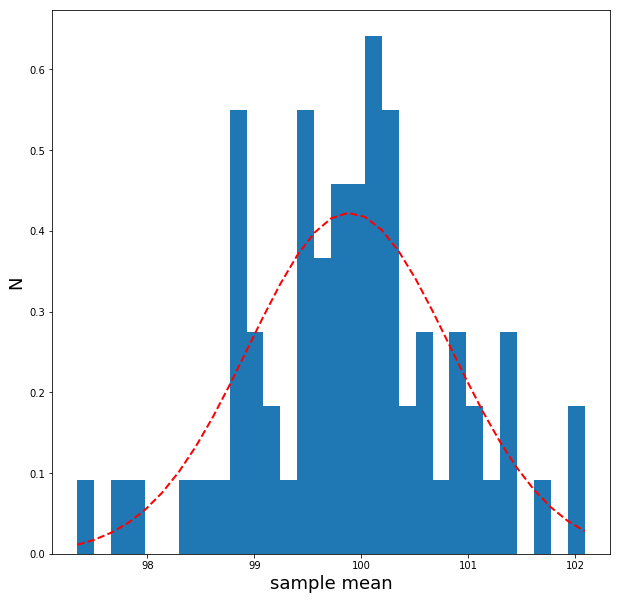

Figure 6. Distribution of means from the Binomial distribution. This histogram shows that the sample mean is centered at 100 with no skewness, meaning that it is symmetric.


In [11]:
allmeans = list(md[distributions[2]]['means'].values())
(mu,sigma) = stats.norm.fit(allmeans)
pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
n,bins,patches=pl.hist(allmeans,30, normed=1)
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

print("Figure 6. Distribution of means from the Binomial distribution. This histogram shows that the sample mean is centered at 100 with no skewness, meaning that it is symmetric.")


# POISSON distribution

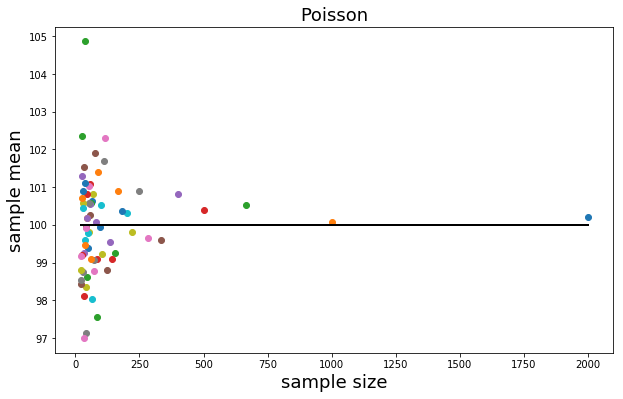

Figure 7. Sample mean vs the sample size for POISSON distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us


In [12]:
md[distributions[3]] = {} 

for n in mysize:
    md[distributions[3]][n] = np.random.poisson(lam=df, size = n)
    
# save the means for plotting later    

md[distributions[3]]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[distributions[3]]:
    if not type(nn) == str:
        md[distributions[3]]['means'][nn] = md[distributions[3]][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[distributions[3]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
pl.show()
print("Figure 7. Sample mean vs the sample size for POISSON distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us")

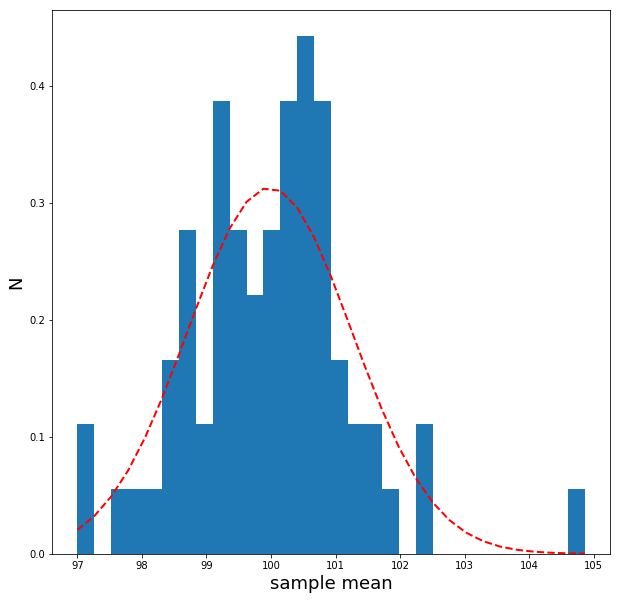

Figure 8. Distribution of means from the Poisson distribution. This histogram shows that the sample mean is centered at 100 but it is slightly positively skewed.


In [17]:
allmeans = list(md[distributions[3]]['means'].values())
(mu,sigma) = stats.norm.fit(allmeans)
pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
n,bins,patches=pl.hist(allmeans,30, normed=1)
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

print("Figure 8. Distribution of means from the Poisson distribution. This histogram shows that the sample mean is centered at 100 but it is slightly positively skewed.")

# EXPONENTIAL distribution

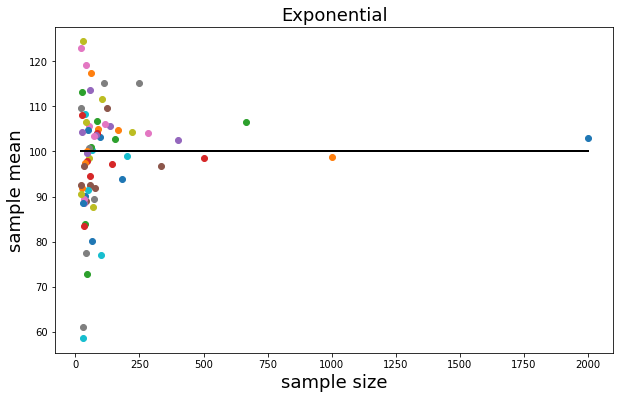

Figure 9. Sample mean vs the sample size for EXPONENTIAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us


In [14]:
md[distributions[4]] = {} 

for n in mysize:
    md[distributions[4]][n] = np.random.exponential(scale=df, size = n)
    
# save the means for plotting later    

md[distributions[4]]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[distributions[4]]:
    if not type(nn) == str:
        md[distributions[4]]['means'][nn] = md[distributions[4]][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[distributions[4]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
pl.show()
print("Figure 9. Sample mean vs the sample size for EXPONENTIAL distribution, showing as the Central Limit Theorem says, that as you increase the number of samples, the sample mean will approximate a Normal distribution. Also, the mean will be the same of the parent distribution, in this case the mean of 100 selected by us")

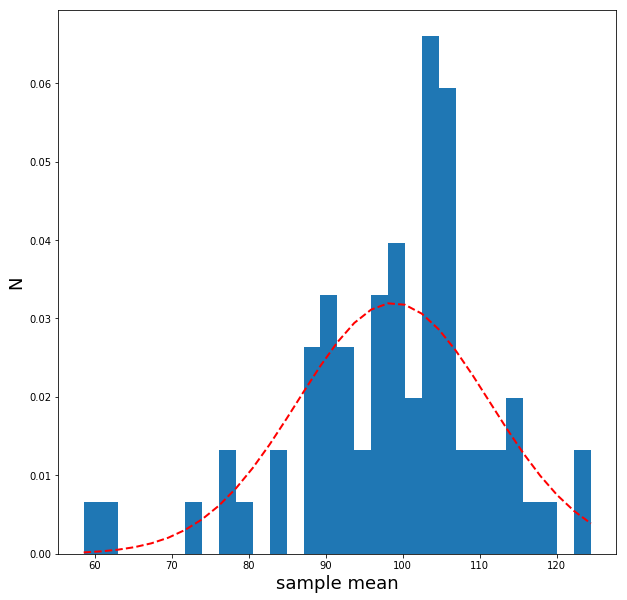

Figure 10. Distribution of means from the Exponential distribution. This histogram shows that the sample mean is centered at 100 but it is slightly negatively skewed.


In [18]:
allmeans = list(md[distributions[4]]['means'].values())
(mu,sigma) = stats.norm.fit(allmeans)
pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
n,bins,patches=pl.hist(allmeans,30, normed=1)
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

print("Figure 10. Distribution of means from the Exponential distribution. This histogram shows that the sample mean is centered at 100 but it is slightly negatively skewed.")